In [1]:
from transpile_benchy.metrics.gate_counts import (
    DepthMetric,
    TotalMetric,
    TotalSwaps,
)
from qiskit.circuit.library import iSwapGate
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import Mirage, QiskitLevel3
from mirror_gates.utilities import SubsMetric
from mirror_gates.logging import transpile_benchy_logger

In [2]:
N = 8
coupling_map = CouplingMap.from_line(N)
# coupling_map = CouplingMap.from_heavy_hex(5)

In [3]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../../../circuits/twolocal.txt")

In [4]:
# XXX set consolidate to False
# this is allowed only because my pass manager will preserve consolidation
# see post_stage, I call fastconsolidate manually

# NOTE: use TotalSwaps to verify baselines have > 0 swaps
# otherwise, there is no room for improvement.
# we can include these if we want to show our methods will still work
# but somewhat trivial since we just append VF2Layout
metrics = [
    DepthMetric(consolidate=False),
    TotalMetric(consolidate=False),
    TotalSwaps(consolidate=False),
    SubsMetric(),
]

transpilers = [
    QiskitLevel3(coupling_map, cx_basis=True),
    Mirage(
        coupling_map,
        logger=transpile_benchy_logger,
        cx_basis=True,
    ),
    QiskitLevel3(coupling_map, cx_basis=False),
    Mirage(
        coupling_map,
        logger=transpile_benchy_logger,
        cx_basis=False,
    ),
]

In [5]:
from transpile_benchy.benchmark import Benchmark

benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    logger=transpile_benchy_logger,
    num_runs=3,
)

benchmark.run()
# print(benchmark)

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | cx
  0.00% =    0/1    	 | 2.00	 | cx.cx
100.00% =    1/1    	 | 3.00	 | cx.cx.cx


INFO:transpile_benchy:Running benchmarks for circuits...


Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


Circuits from library:   0%|          | 0/4 [00:00<?, ?it/s]INFO:transpile_benchy:Running benchmark for circuit fullecp_n8


Loading fullecp_n8 from QiskitCircuitInterface


Circuits from library:  25%|██▌       | 1/4 [02:12<06:38, 132.76s/it]INFO:transpile_benchy:Running benchmark for circuit fullcnot_n8


Loading fullcnot_n8 from QiskitCircuitInterface


Circuits from library:  50%|█████     | 2/4 [04:06<04:03, 121.86s/it]INFO:transpile_benchy:Running benchmark for circuit fulliswap_n8


Loading fulliswap_n8 from QiskitCircuitInterface


Circuits from library:  75%|███████▌  | 3/4 [06:01<01:58, 118.52s/it]INFO:transpile_benchy:Running benchmark for circuit fullsqiswap_n8


Loading fullsqiswap_n8 from QiskitCircuitInterface


Circuits from library: 100%|██████████| 4/4 [07:54<00:00, 118.67s/it]


In [6]:
print(benchmark)


Transpiler: Mirage-$\sqrt{\texttt{iSWAP}}$

  Metric: accepted_subs
  Circuit: fullcnot_n8                              Mean result: 0.991                          Trials: [0.990990990990991, 0.990990990990991, 0.990990990990991]
  Circuit: fullecp_n8                               Mean result: 0.991                          Trials: [0.990990990990991, 0.990990990990991, 0.990990990990991]
  Circuit: fulliswap_n8                             Mean result: 0.991                          Trials: [0.990990990990991, 0.990990990990991, 0.990990990990991]
  Circuit: fullsqiswap_n8                           Mean result: 0.991                          Trials: [0.990990990990991, 0.990990990990991, 0.990990990990991]

  Metric: monodromy_depth
  Circuit: fullcnot_n8                              Mean result: 37.000                         Trials: [37.0, 37.0, 37.0]
  Circuit: fullecp_n8                               Mean result: 19.500                         Trials: [19.5, 19.5, 19.5]
  Circuit:

In [7]:
benchmark.summary_statistics(transpilers[0], transpilers[1])

{'monodromy_depth': {'average_change': -61.40562580650081,
  'aggregrate_change': -63.23147251888267,
  'best_circuit': 'fulliswap_n8',
  'worst_circuit': 'fullcnot_n8'},
 'monodromy_total': {'average_change': -49.61857766402255,
  'aggregrate_change': -52.56133599349989,
  'best_circuit': 'fulliswap_n8',
  'worst_circuit': 'fullcnot_n8'},
 'total_swaps': {'average_change': -100.0,
  'aggregrate_change': -100.0,
  'best_circuit': 'fullecp_n8',
  'worst_circuit': 'fullecp_n8'},
 'accepted_subs': {'average_change': inf,
  'aggregrate_change': inf,
  'best_circuit': 'fullecp_n8',
  'worst_circuit': 'fullecp_n8'},
 'total_runtime': {'average_change': 3864.774545888157,
  'aggregrate_change': 3656.053307969139,
  'best_circuit': 'fullecp_n8',
  'worst_circuit': 'fulliswap_n8'}}

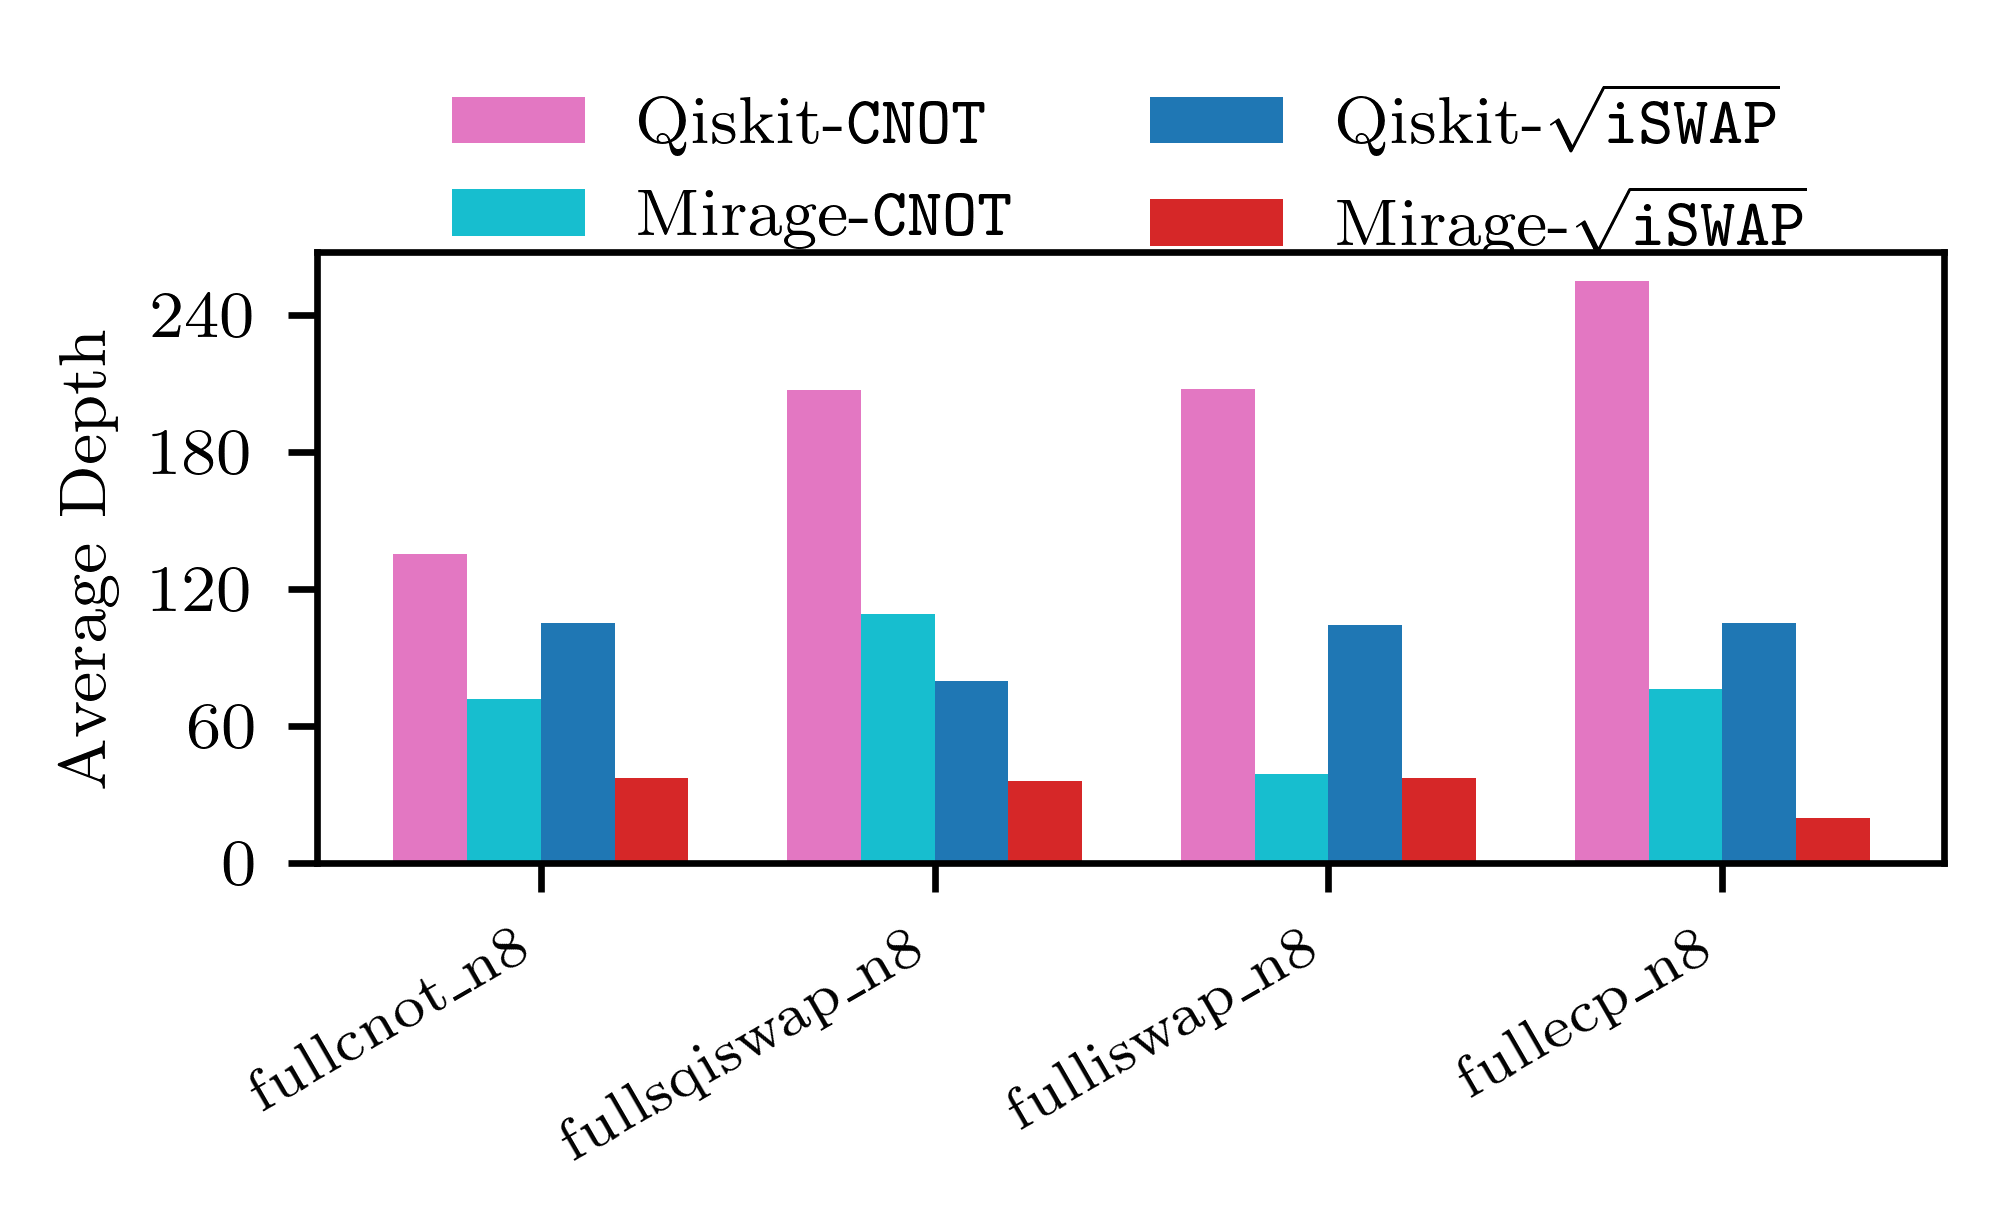

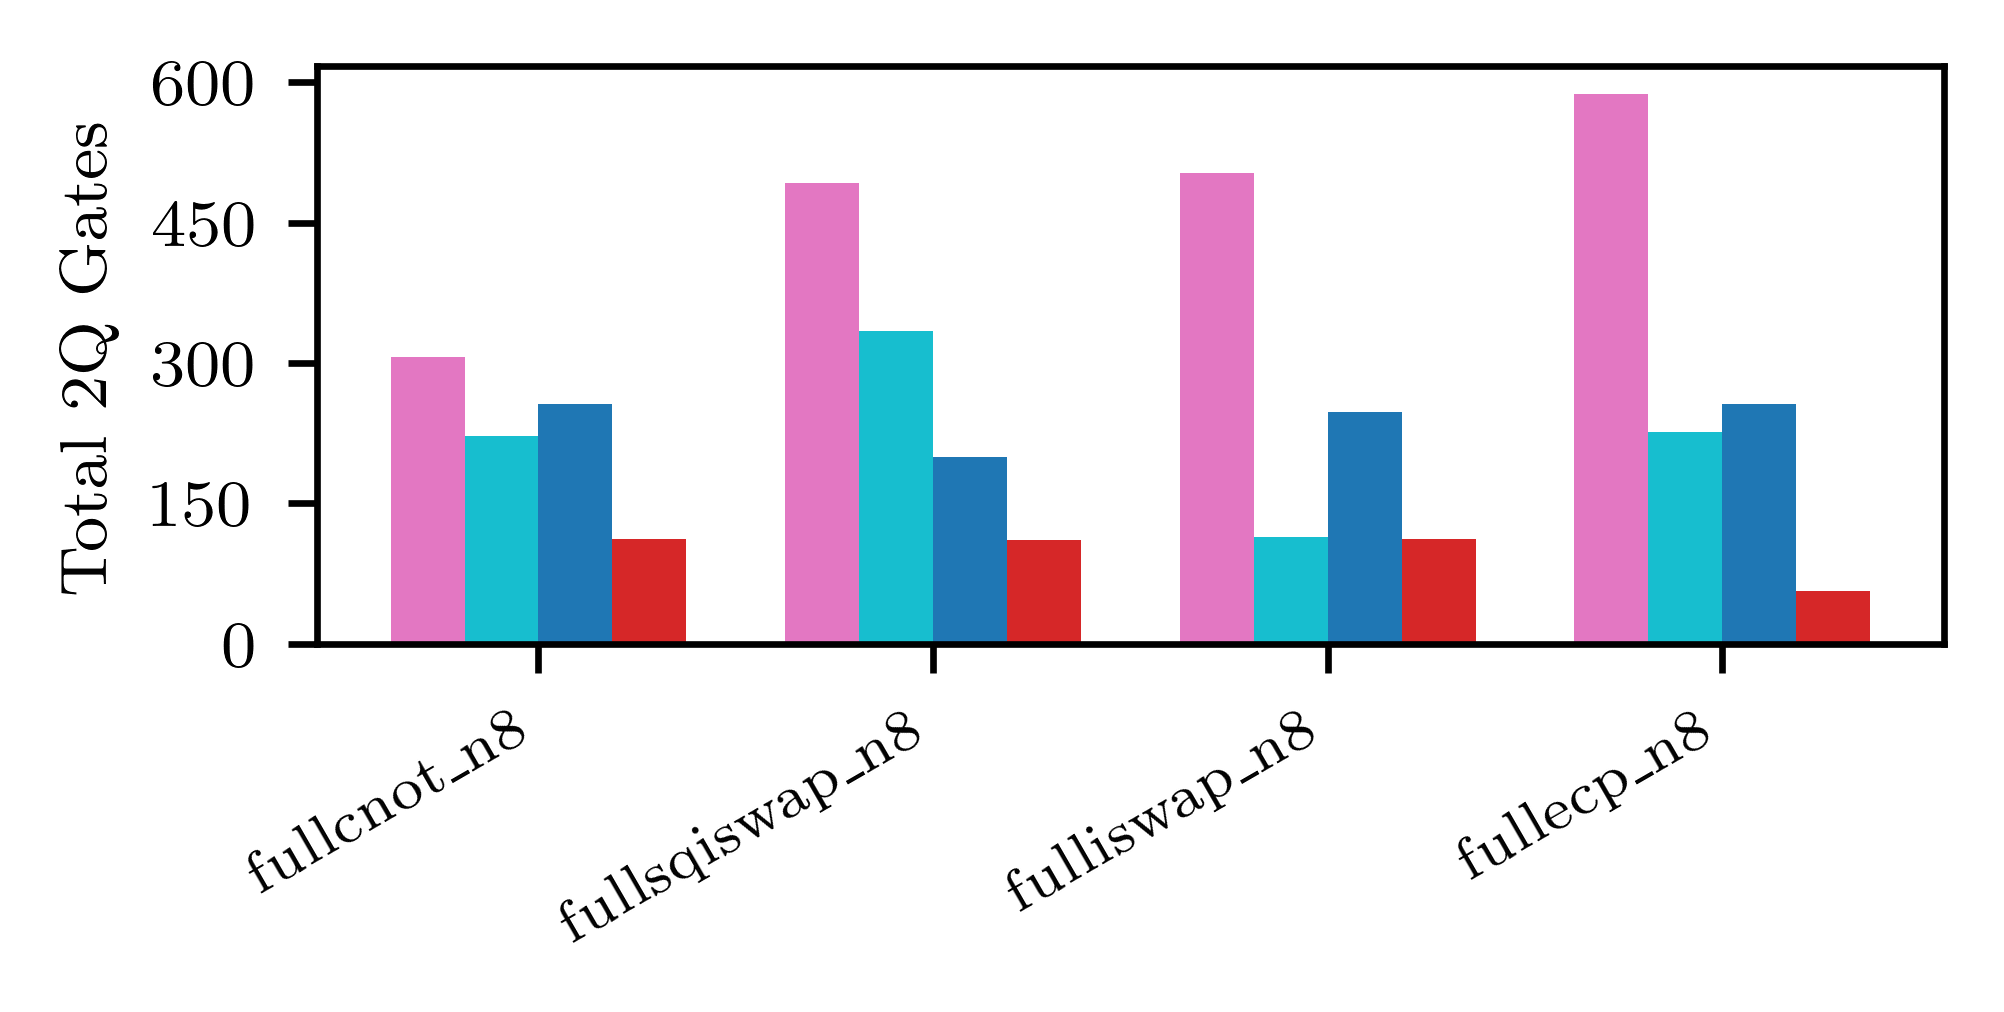

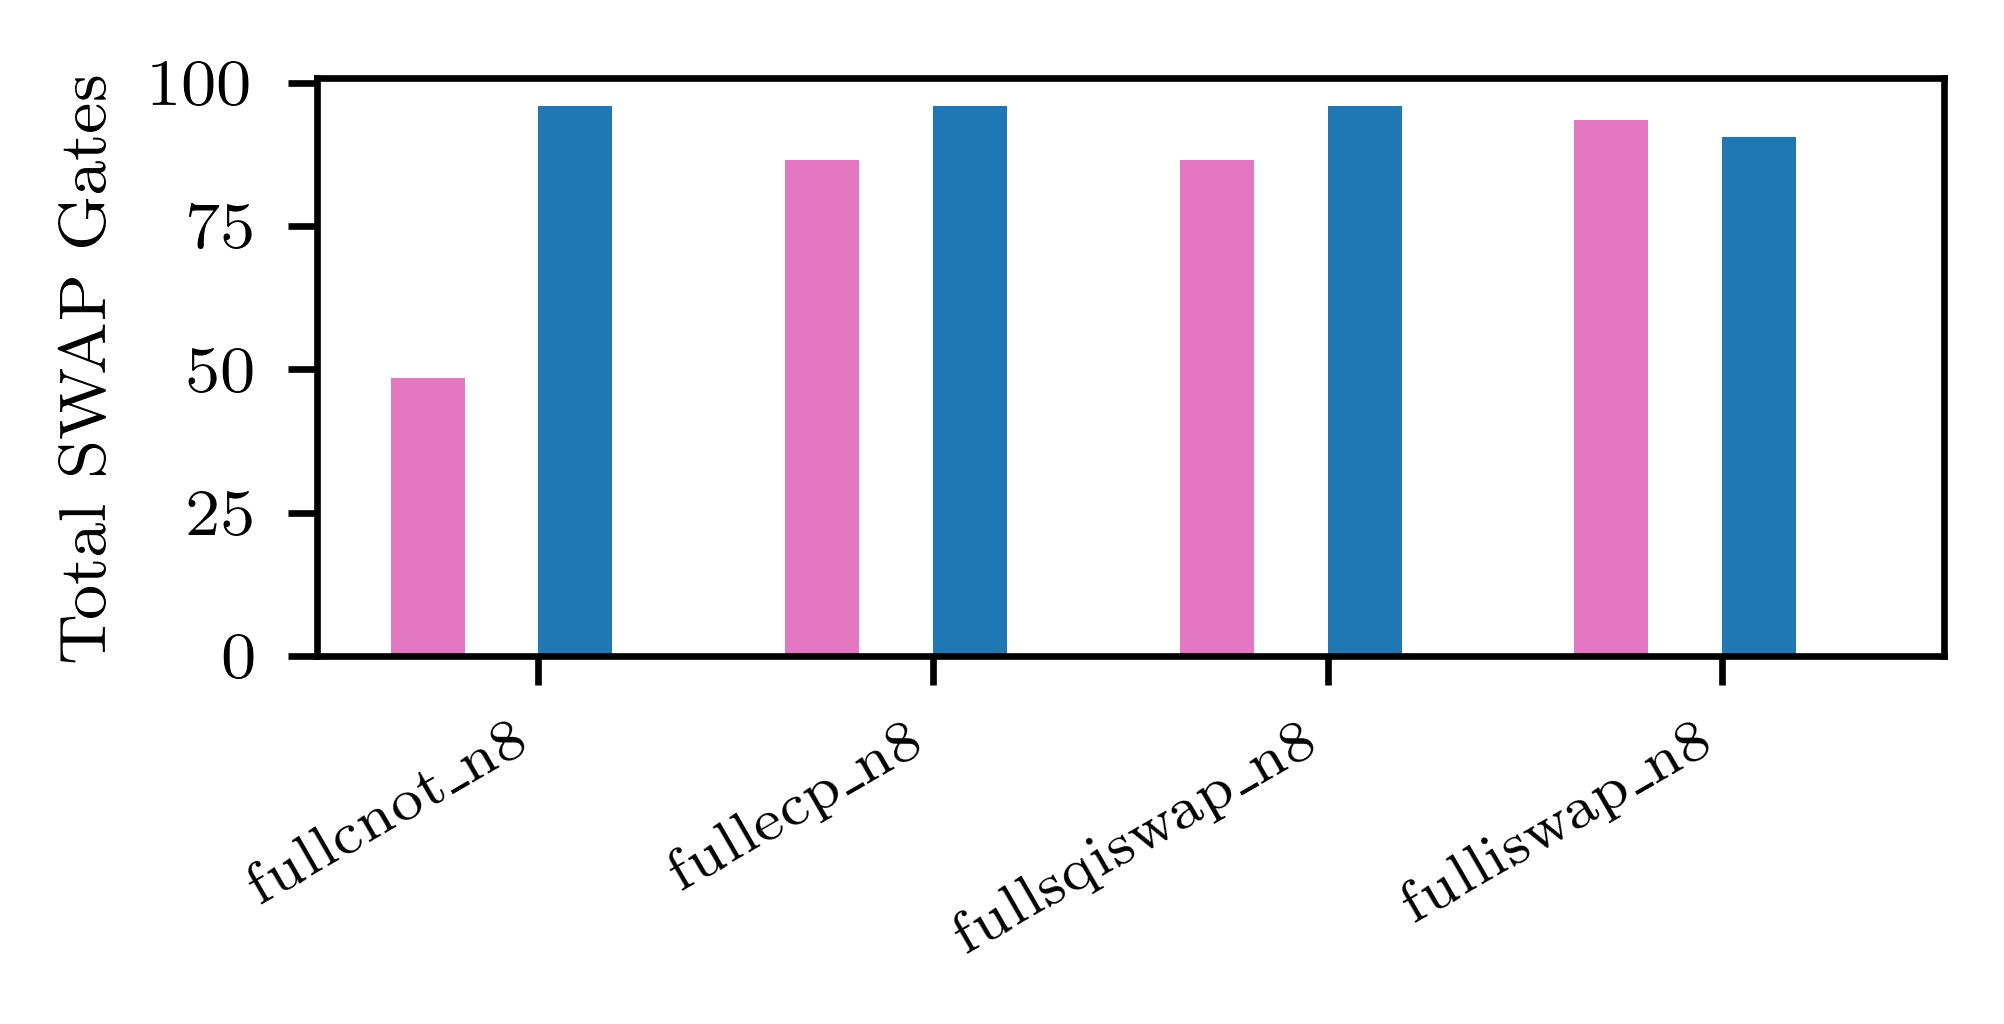

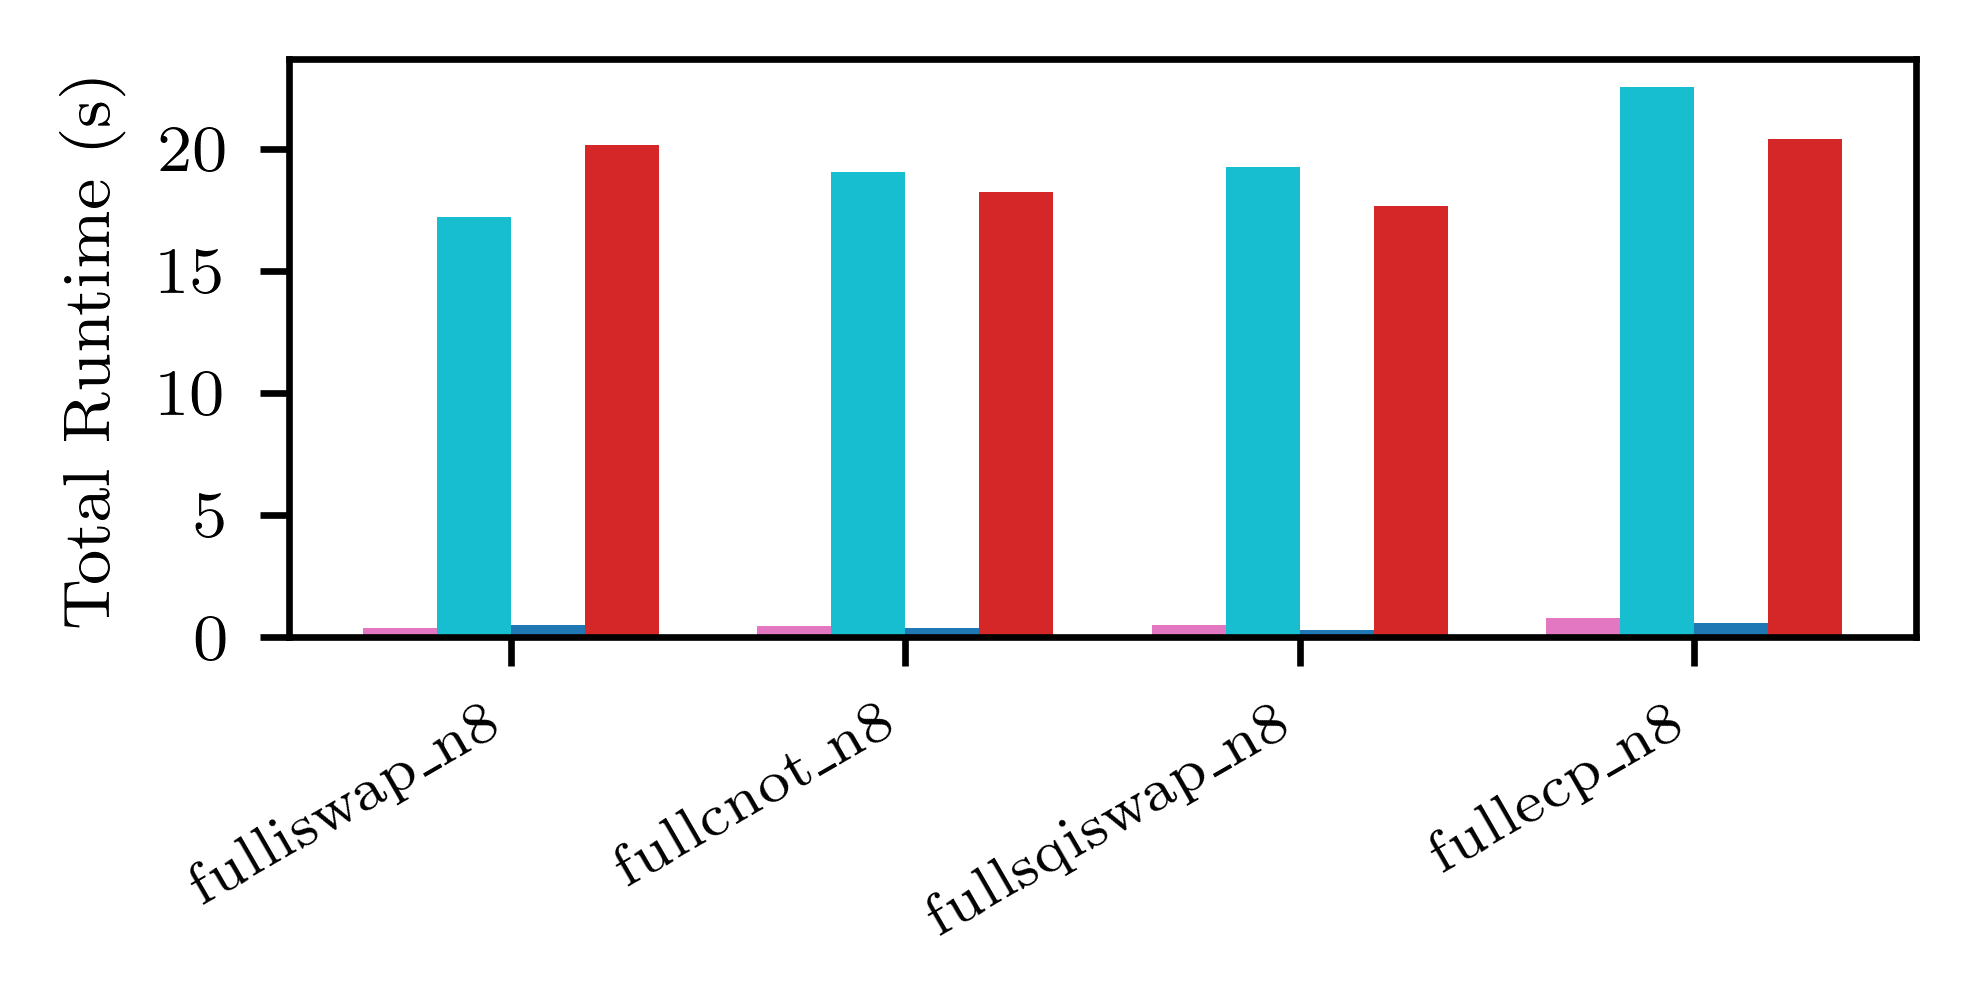

In [8]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(
    benchmark,
    save=1,
    legend_show=1,
    filename="twolocal",
    color_override=[6, 9, 0, 3],
    fixed_bar_width=3,
)